In [3]:
import os
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.collocations import *

In [4]:
import pandas as pd
import numpy as np

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read job description


In [6]:
path =  "data"

In [7]:
os.chdir(path)

In [8]:
with open('job_description.txt') as f:
    data = f.read()

In [9]:
print(data)

Job Description


Do you find yourself searching for a truly unique working environment? Do you have a go-getter attitude? Well, are you ready to take on a new challenge? We have an exciting opportunity for a Data Analyst (Underwriting & Lending) to join Dot818’s growing team!

We’re looking for a special kind of candidate – someone who appreciates challenging projects, is comfortable working with a supportive team, and hungers for the freedom to think outside of the box. We also want you to care about our core values too. We have a deep commitment to success, we build strong relationships through tenacious effort, and we keep a firm focus on our client’s needs. If this sounds like your dream job, take the first step toward joining our team and apply now with your resume.

The Data Analyst is expected to thoroughly understand the credit/lending risk domain, and frequently use industry specific risk analysis best practices when operating and building predictive models. The ideal candida

In [10]:
# Convert the text to lowercase
data = data.lower()

In [135]:
wc = WordCloud(background_color = 'white',width = 3200, height = 3200)#(color_func=lambda *args, **kwargs: "blue", background_color = 'white')
wc.generate(data)
plt.imshow(wc )#, interpolation='bilinear')
plt.axis("off")
plt.show()

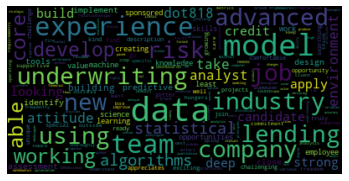

In [122]:
wc = WordCloud(max_font_size=40).generate(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Finding total number of words and punctuation in the text

In [10]:
tokens = nltk.word_tokenize(data)

In [11]:
print(len(tokens))

550


In [145]:
tokens

['job',
 'description',
 'do',
 'you',
 'find',
 'yourself',
 'searching',
 'for',
 'a',
 'truly',
 'unique',
 'working',
 'environment',
 '?',
 'do',
 'you',
 'have',
 'a',
 'go-getter',
 'attitude',
 '?',
 'well',
 ',',
 'are',
 'you',
 'ready',
 'to',
 'take',
 'on',
 'a',
 'new',
 'challenge',
 '?',
 'we',
 'have',
 'an',
 'exciting',
 'opportunity',
 'for',
 'a',
 'data',
 'analyst',
 '(',
 'underwriting',
 '&',
 'lending',
 ')',
 'to',
 'join',
 'dot818',
 '’',
 's',
 'growing',
 'team',
 '!',
 'we',
 '’',
 're',
 'looking',
 'for',
 'a',
 'special',
 'kind',
 'of',
 'candidate',
 '–',
 'someone',
 'who',
 'appreciates',
 'challenging',
 'projects',
 ',',
 'is',
 'comfortable',
 'working',
 'with',
 'a',
 'supportive',
 'team',
 ',',
 'and',
 'hungers',
 'for',
 'the',
 'freedom',
 'to',
 'think',
 'outside',
 'of',
 'the',
 'box',
 '.',
 'we',
 'also',
 'want',
 'you',
 'to',
 'care',
 'about',
 'our',
 'core',
 'values',
 'too',
 '.',
 'we',
 'have',
 'a',
 'deep',
 'commitment

In [16]:
# Removing Stop-words
stop = set(stopwords.words('english'))

In [13]:
token_list1 = []

In [14]:
for token in tokens:
    if token not in stop:
        token_list1.append(token)

In [15]:
print(len(token_list1))

378


In [43]:
# Removing punctuation
punctuation = re.compile(r'[-.?!,":;()|0-9]'+"'")

In [44]:
token_list2 = []

In [45]:
for token in token_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        token_list2.append(word)

In [46]:
print(len(token_list2))

378


In [47]:
tokens_pos_tag = nltk.pos_tag(token_list2)

In [48]:
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

In [49]:
pos_df.head()

word  POS
0          job   NN
1  description   NN
2         find  VBP
3    searching  VBG
4        truly   RB

In [50]:
# group by POS tags
pos_sum = pos_df.groupby('POS', as_index=False).count() 

In [51]:
# in descending order of number of words per tag
pos_sum.sort_values(['word'], ascending=[False]) 

POS  word
11   NN   114
8    JJ    69
13  NNS    55
2     ,    32
18  VBG    26
20  VBP    16
16   VB    16
3     .    14
14   RB     7
7    IN     4
17  VBD     3
21  VBZ     3
9   JJS     3
6    CD     3
4     :     3
12  NNP     2
5    CC     2
19  VBN     2
1     )     1
10   MD     1
15  RBR     1
0     (     1

In [52]:
#filtering nouns out of all the words
filtered_pos = []

In [53]:
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)

In [54]:
print (len(filtered_pos))

171


In [55]:
#Finding most frequent words

In [56]:
fdist_pos = nltk.FreqDist(filtered_pos)

In [136]:
top_100_words = fdist_pos.most_common(1000)

In [137]:
print(top_100_words)

[(('data', 'NNS'), 9), (('models', 'NNS'), 6), (('team', 'NN'), 5), (('experience', 'NN'), 5), (('risk', 'NN'), 4), (('industry', 'NN'), 4), (('job', 'NN'), 3), (('core', 'NN'), 3), (('company', 'NN'), 3), (('environment', 'NN'), 2), (('attitude', 'NN'), 2), (('analyst', 'NN'), 2), (('lending', 'NN'), 2), (('’', 'NNP'), 2), (('candidate', 'NN'), 2), (('building', 'NN'), 2), (('tools', 'NNS'), 2), (('underwriting', 'NN'), 2), (('assessment', 'NN'), 2), (('opportunities', 'NNS'), 2), (('science', 'NN'), 2), (('machine', 'NN'), 2), (('skills', 'NNS'), 2), (('work', 'NN'), 2), (('employee', 'NN'), 2), (('description', 'NN'), 1), (('challenge', 'NN'), 1), (('opportunity', 'NN'), 1), (('join', 'NN'), 1), (('’', 'NN'), 1), (('kind', 'NN'), 1), (('–', 'NN'), 1), (('someone', 'NN'), 1), (('projects', 'NNS'), 1), (('hungers', 'NNS'), 1), (('box', 'NN'), 1), (('care', 'NN'), 1), (('values', 'NNS'), 1), (('commitment', 'NN'), 1), (('success', 'NN'), 1), (('relationships', 'NNS'), 1), (('effort', '

In [138]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))

In [139]:
top_words_df.head()

pos  count
0       (data, NNS)      9
1     (models, NNS)      6
2        (team, NN)      5
3  (experience, NN)      5
4        (risk, NN)      4

In [140]:
# split the tuple of POS
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) 

In [141]:
 # drop the previous column
top_words_df = top_words_df.drop('pos', 1)

In [153]:
top_words_df[top_words_df['count']>1]

count           Word
0       9           data
1       6         models
2       5           team
3       5     experience
4       4           risk
5       4       industry
6       3            job
7       3           core
8       3        company
9       2    environment
10      2       attitude
11      2        analyst
12      2        lending
13      2              ’
14      2      candidate
15      2       building
16      2          tools
17      2   underwriting
18      2     assessment
19      2  opportunities
20      2        science
21      2        machine
22      2         skills
23      2           work
24      2       employee

In [143]:
d ={}
for a,x in tuples_pos:
    d[a] = x

In [144]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
d ={}
for a,x in tuples_pos:
    d[a] = x

In [64]:
subset_pos = top_words_df[['Word', 'count']]

In [77]:
tuples_pos = [tuple(x) for x in subset_pos.values]

In [78]:
print(type(tuples_pos))

<class 'list'>


In [79]:
print(type(tuples_pos[1]))

<class 'tuple'>


In [158]:
subset_pos1 = top_words_df[['Word', 'count']][top_words_df['count']>1]
tuples_pos1 = [tuple(x) for x in subset_pos.values]
d ={}
for a,x in tuples_pos1:
    d[a] = x
wordcloud = WordCloud(background_color = 'white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
def Convert(tup, di): 
    for a, b in tup: 
        di.setdefault(a, []).append(b) 
    return di 
      
# Driver Code     
tups = [("akash", 10), ("gaurav", 12), ("anand", 14),  
     ("suraj", 20), ("akhil", 25), ("ashish", 30)] 
dictionary = {} 
print (Convert(tuples_pos, dictionary)) 

{'data': [9], 'models': [6], 'team': [5], 'experience': [5], 'risk': [4], 'industry': [4], 'job': [3], 'core': [3], 'company': [3], 'environment': [2], 'attitude': [2], 'analyst': [2], 'lending': [2], '’': [2, 1], 'candidate': [2], 'building': [2], 'tools': [2], 'underwriting': [2], 'assessment': [2], 'opportunities': [2], 'science': [2], 'machine': [2], 'skills': [2], 'work': [2], 'employee': [2], 'description': [1], 'challenge': [1], 'opportunity': [1], 'join': [1], 'kind': [1], '–': [1], 'someone': [1], 'projects': [1], 'hungers': [1], 'box': [1], 'care': [1], 'values': [1], 'commitment': [1], 'success': [1], 'relationships': [1], 'effort': [1], 'focus': [1], 'client': [1], 'sounds': [1], 'dream': [1], 'step': [1], 'domain': [1], 'specific': [1], 'analysis': [1], 'practices': [1], 'frameworks': [1], 'dashboards': [1], 'requirements': [1], 'credit': [1], 'metrics': [1], 'interaction': [1], 'architecture': [1], 'optimization': [1], 'modeling': [1], 'implement': [1], 'custom': [1], 'mo

In [75]:
tuples_pos

{('ability', 1),
 ('accuracy', 1),
 ('analysis', 1),
 ('analyst', 2),
 ('analytics', 1),
 ('architecture', 1),
 ('assessment', 2),
 ('attitude', 2),
 ('box', 1),
 ('building', 2),
 ('candidate', 2),
 ('care', 1),
 ('challenge', 1),
 ('changes', 1),
 ('client', 1),
 ('commitment', 1),
 ('communication', 1),
 ('company', 3),
 ('compensation', 1),
 ('computer', 1),
 ('concepts', 1),
 ('core', 3),
 ('credit', 1),
 ('culture', 1),
 ('custom', 1),
 ('customers', 1),
 ('dashboards', 1),
 ('data', 9),
 ('description', 1),
 ('discipline', 1),
 ('domain', 1),
 ('dream', 1),
 ('effort', 1),
 ('employee', 2),
 ('environment', 2),
 ('experience', 5),
 ('family', 1),
 ('fintech', 1),
 ('focus', 1),
 ('frameworks', 1),
 ('fridays', 1),
 ('holidays', 1),
 ('hungers', 1),
 ('implement', 1),
 ('industry', 4),
 ('interaction', 1),
 ('intuition', 1),
 ('job', 3),
 ('join', 1),
 ('kind', 1),
 ('knowledge', 1),
 ('lending', 2),
 ('machine', 2),
 ('mathematics', 1),
 ('methods', 1),
 ('metrics', 1),
 ('model

In [85]:
bgs = nltk.bigrams(tokens)
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens

In [86]:
bgs_100 = fdist2.most_common(100) # top-100 bigrams

In [87]:
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))


In [88]:
bgs_df.head()

bigram  count
0     (,, and)     10
1     (for, a)      3
2  (you, have)      3
3    (have, a)      3
4       (’, s)      3

In [89]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string

In [90]:
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuationbgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [91]:

bgs_df.head()

bigram  count    phrase  filter_bgs
0     (,, and)     10     , and       False
1     (for, a)      3     for a       False
2  (you, have)      3  you have       False
3    (have, a)      3    have a       False
4       (’, s)      3       ’ s       False

In [92]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

In [93]:
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

In [94]:
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

count        phrase
0     10         , and
1      3         for a
2      3      you have
3      3        have a
4      3           ’ s
5      3       able to
6      2        do you
7      2       we have
8      2  data analyst
9      2   looking for

In [95]:
tgs = nltk.trigrams(tokens)

In [96]:
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens

In [97]:
tgs_100 = fdist3.most_common(100) # top-100 trigrams

In [98]:
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))

In [99]:
tgs_df.head()

trigram  count
0               (be, able, to)      2
1    (develop, and, implement)      2
2  (experience, creating, and)      2
3       (creating, and, using)      2
4       (and, using, advanced)      2

In [100]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2]) # merging the tuple into a string

In [101]:
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation


In [102]:
tgs_df.head()

trigram  count                   phrase  filter_tgs
0               (be, able, to)      2               be able to       False
1    (develop, and, implement)      2    develop and implement       False
2  (experience, creating, and)      2  experience creating and       False
3       (creating, and, using)      2       creating and using       False
4       (and, using, advanced)      2       and using advanced       False

In [103]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation


In [104]:
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns

In [105]:
tgs_df.reset_index()
tgs_df.head(20) #Final trigrams

count                       phrase
0       2                   be able to
1       2        develop and implement
2       2      experience creating and
3       2           creating and using
4       2           and using advanced
5       2       using advanced machine
6       2    advanced machine learning
7       2  machine learning algorithms
8       2               , and employee
9       1           job description do
10      1           description do you
11      1                  do you find
12      1            you find yourself
13      1      find yourself searching
14      1       yourself searching for
15      1              searching for a
16      1                  for a truly
17      1               a truly unique
18      1         truly unique working
19      1   unique working environment

In [111]:
tgs_df[['phrase','count']]

phrase  count
0                be able to      2
1     develop and implement      2
2   experience creating and      2
3        creating and using      2
4        and using advanced      2
..                      ...    ...
95         think outside of      1
96           outside of the      1
97               of the box      1
98                the box .      1
99                 box . we      1

[100 rows x 2 columns]

In [147]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = tgs_df.phrase.values
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

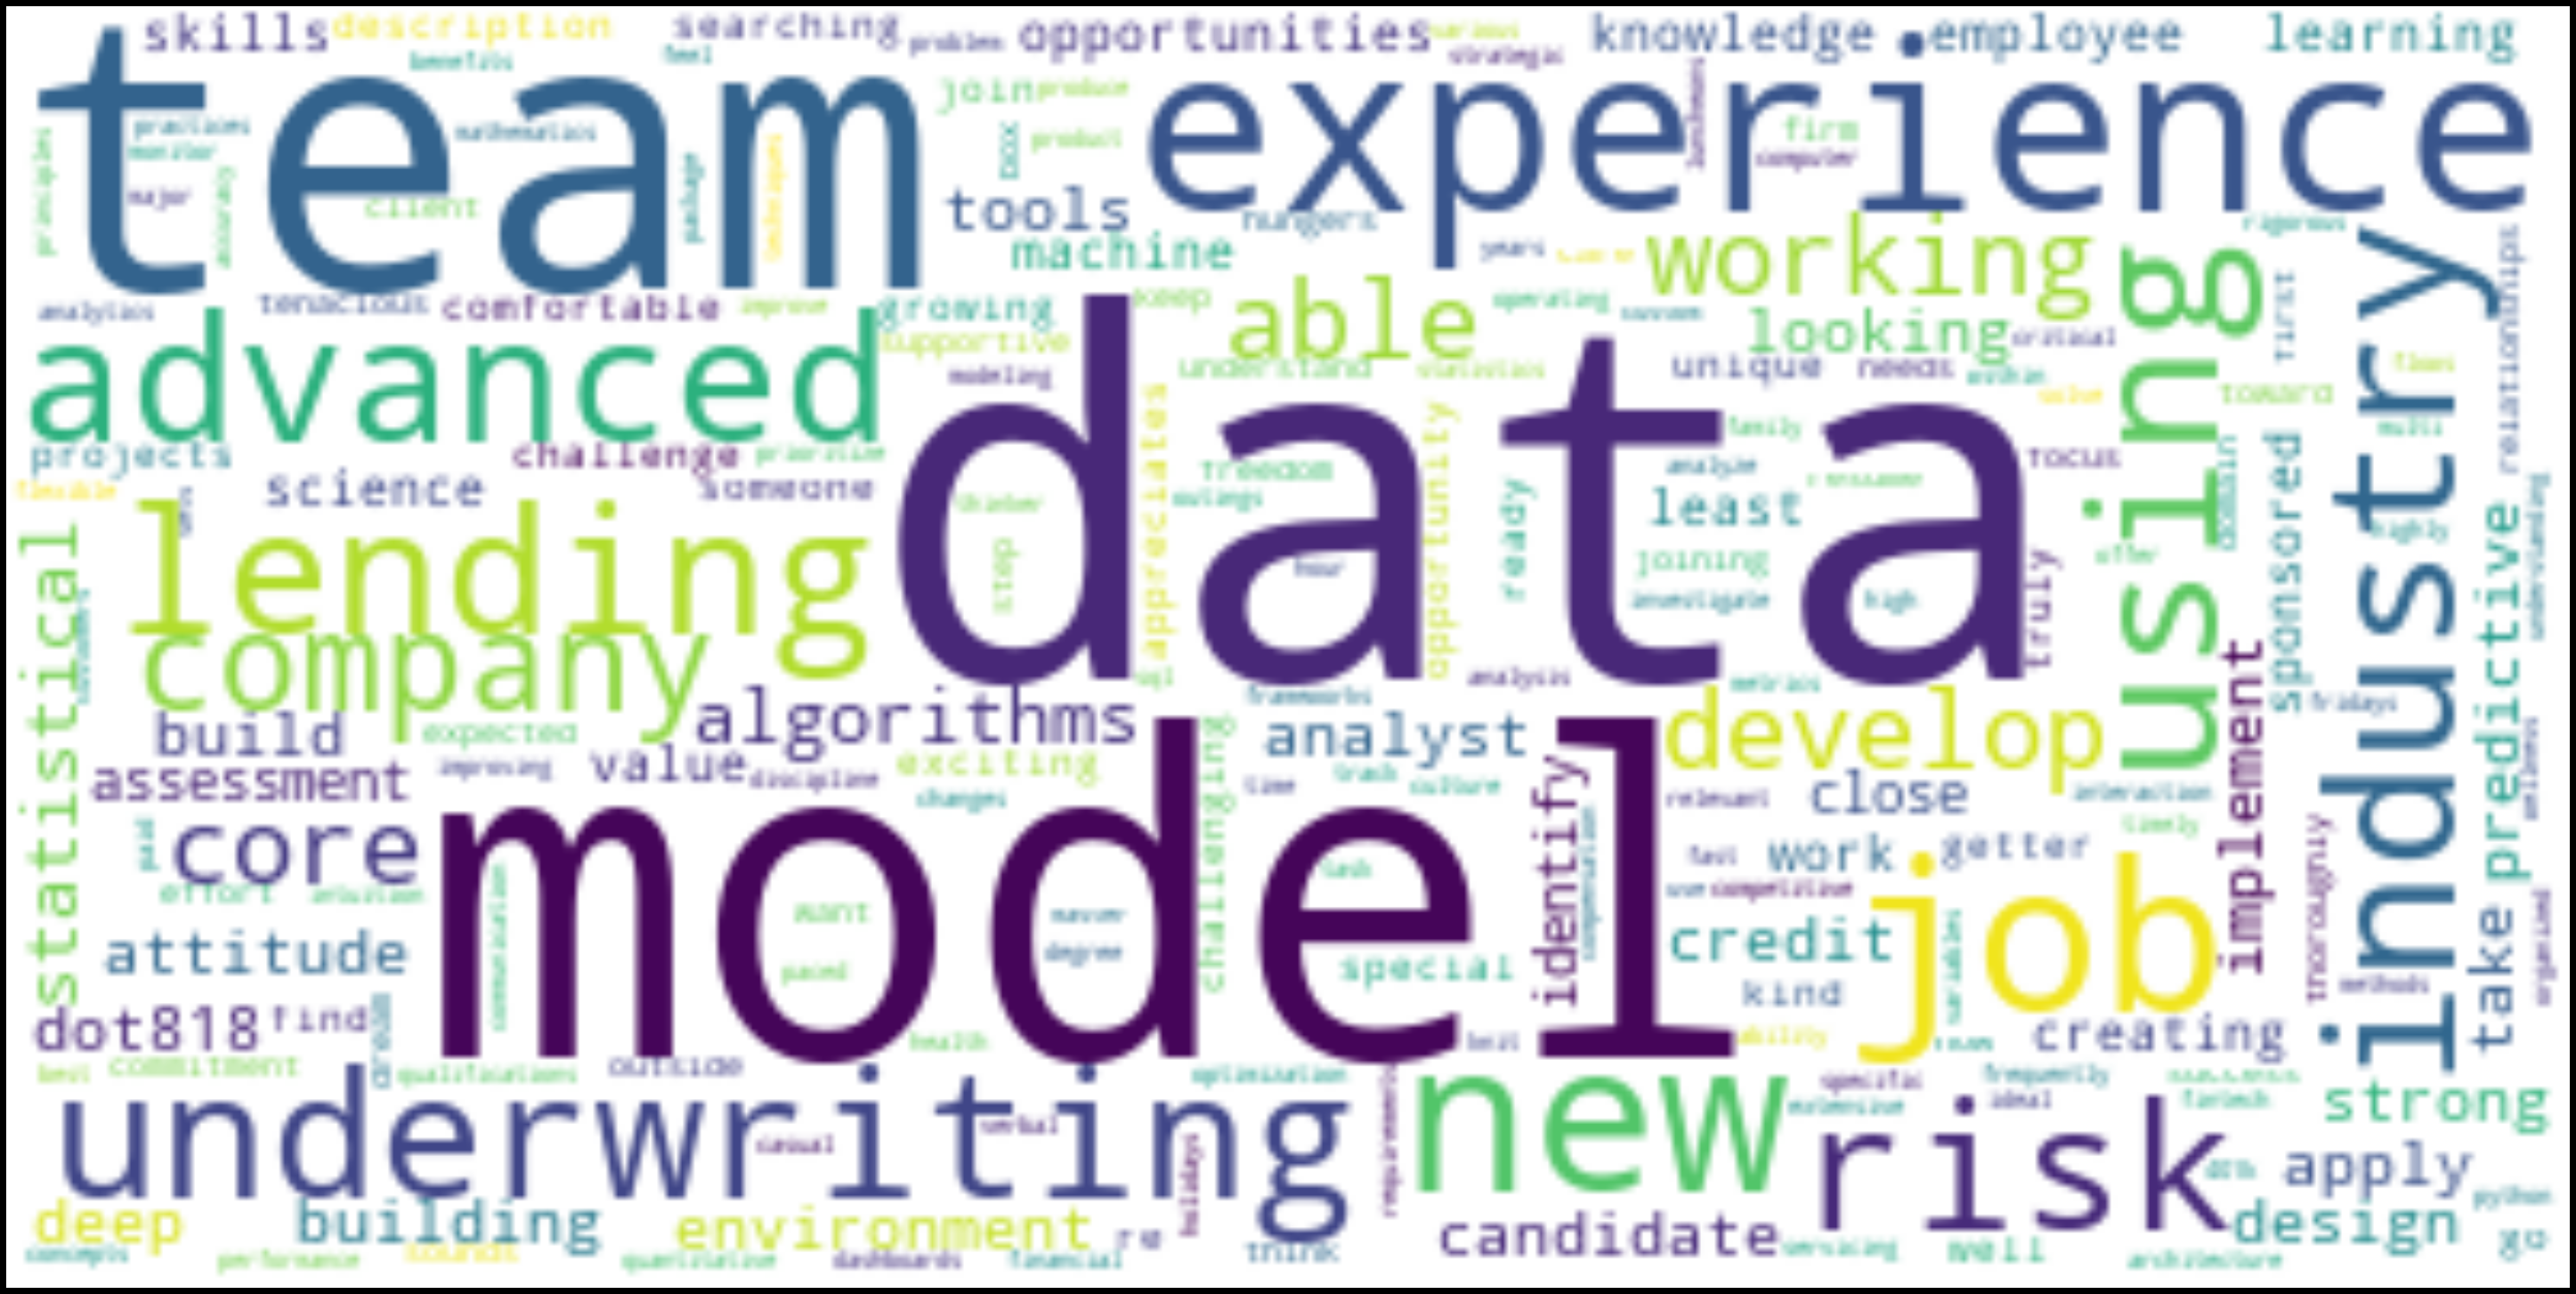

In [148]:
#text = tgs_df.phrase.values
wordcloud = WordCloud(
    background_color = 'white',
    ).generate(str(data))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
stop_words =  stopwords.words('english')   
extra_stop_words = ["experience", "position", "work", "please", "click", "must", "may", "required", "preferred", 
                    "type", "including", "strong", "ability", "needs", "apply", "skills", "requirements", "company", 
                    "knowledge", "job", "responsibilities"] 
stop_words += extra_stop_words

In [12]:
import sys, string, datetime
punctuation = string.punctuation
job_desc = re.sub('https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
job_desc = job_desc.translate(job_desc.maketrans(punctuation, ' ' * len(punctuation)))  
job_desc

'job description\n\n\ndo you find yourself searching for a truly unique working environment  do you have a go getter attitude  well  are you ready to take on a new challenge  we have an exciting opportunity for a data analyst  underwriting   lending  to join dot818’s growing team \n\nwe’re looking for a special kind of candidate – someone who appreciates challenging projects  is comfortable working with a supportive team  and hungers for the freedom to think outside of the box  we also want you to care about our core values too  we have a deep commitment to success  we build strong relationships through tenacious effort  and we keep a firm focus on our client’s needs  if this sounds like your dream job  take the first step toward joining our team and apply now with your resume \n\nthe data analyst is expected to thoroughly understand the credit lending risk domain  and frequently use industry specific risk analysis best practices when operating and building predictive models  the ideal

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_para = {
    "stop_words": stop_words,
    "analyzer": 'word',   #analyzer in 'word' or 'character' 
    "token_pattern": r'\w{1,}',    #match any word with 1 and unlimited length 
    "sublinear_tf": False,  #False for smaller data size  #Apply sublinear tf scaling, to reduce the range of tf with 1 + log(tf)
    "dtype": int,   #return data type 
    "norm": 'l2',     #apply l2 normalization
    "smooth_idf":False,   #no need to one to document frequencies to avoid zero divisions
    "ngram_range" : (1, 2),   #the min and max size of tokenized terms
    "max_features": 500    #the top 500 weighted features
}
tfidf_vect = TfidfVectorizer(**tfidf_para)
transformed_job_desc = tfidf_vect.fit_transform(job_desc)

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1813: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'int'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: Iterable over raw text documents expected, string object received.

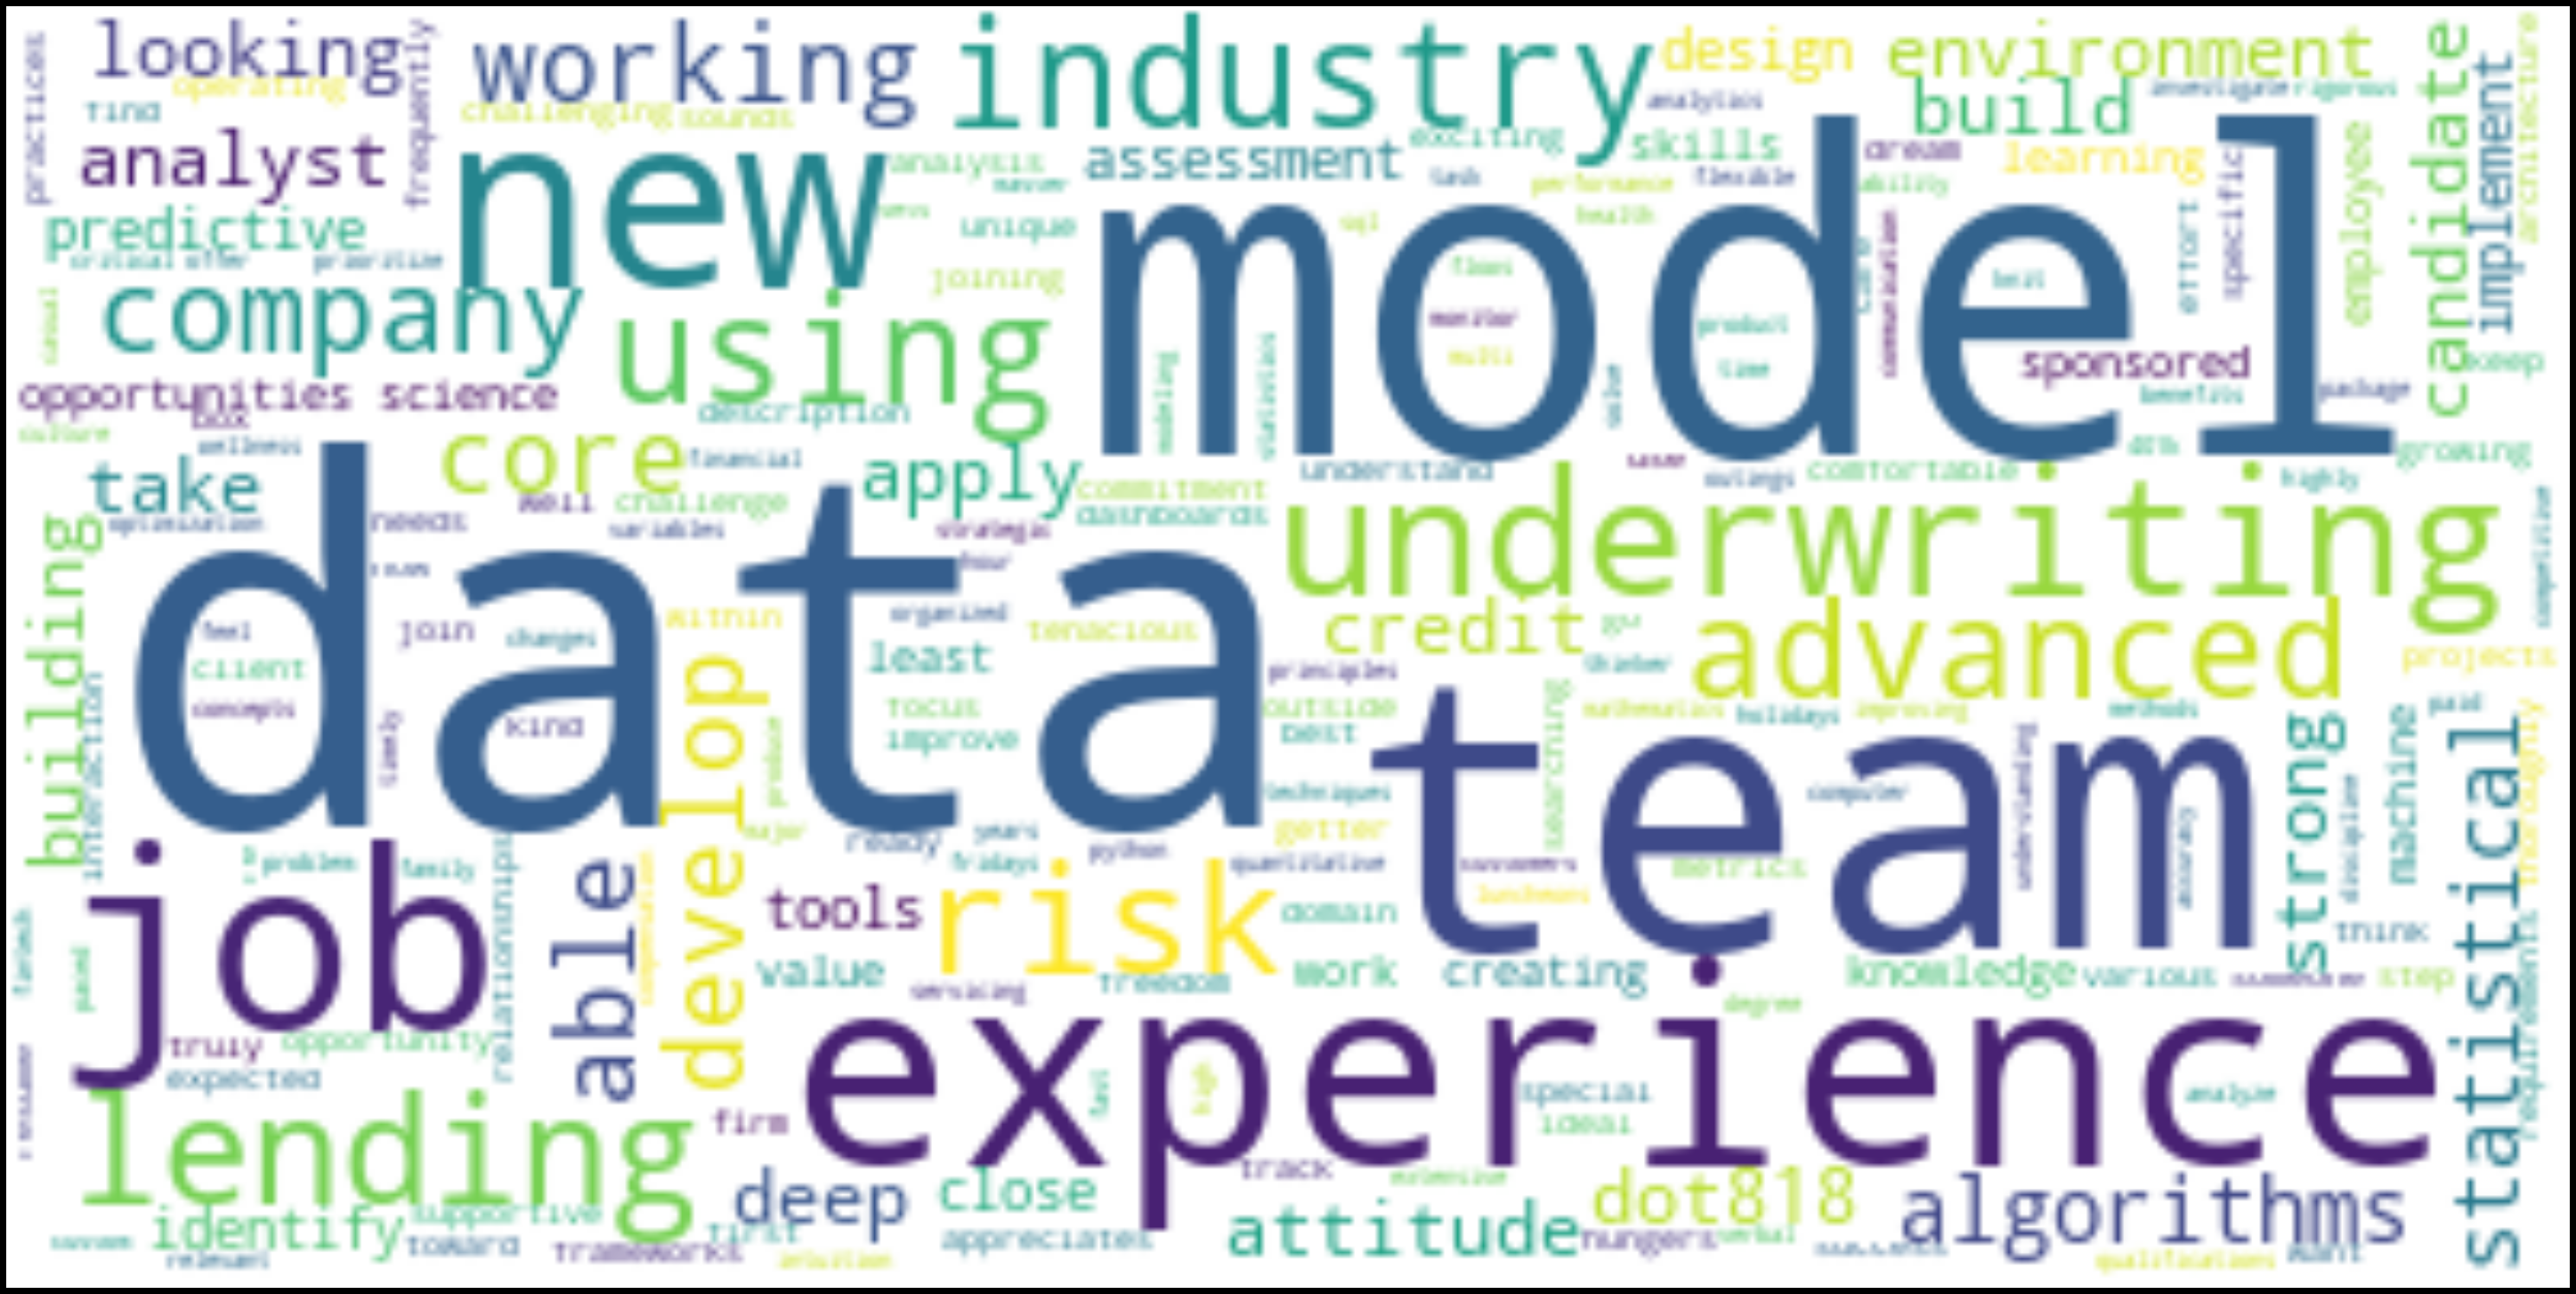

In [16]:
wordcloud = WordCloud(
    background_color = 'white',
    ).generate(str(data))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()